# 3D Plotting with Matplotlib
## Milestone 2: Visualize on a 3D Scatterplot

### Objective
In this milestone, you will visualize the mean number of bikes rented and the mean hourly temperature on a 3D scatterplot. You will differentiate the warmer hours from the cooler ones using colors and text annotations.

### Importance of the Project
This 3D scatterplot will let you visualize the pattern between the bikes rented at every hour of the day and the temperature at those hours. This information on more than two variables in the same plot will help your company decide the best times for sourcing bikes for renters.

### 1. Import libraries and files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_loc = "./data/"
img_loc = "./img/"

In [3]:
data_higher = pd.read_csv(data_loc + "mean_data_by_hour_higher.csv", index_col = 0)
data_lower = pd.read_csv(data_loc + "mean_data_by_hour_lower.csv", index_col = 0)

In [4]:
data_higher

,Hour,Rented Bike Count,Temperature(°C)
0,10,527.82,12.91
1,11,600.85,14.31
2,12,699.44,15.46
3,13,733.25,16.26
4,14,758.82,16.82
5,15,829.19,17.04
6,16,930.62,16.90
7,17,1138.51,16.25
8,18,1502.93,15.30
9,19,1195.15,14.28


In [5]:
data_higher.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               11 non-null     int64  
 1   Rented Bike Count  11 non-null     float64
 2   Temperature(°C)    11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 352.0 bytes


In [6]:
data_higher

,Hour,Rented Bike Count,Temperature(°C)
0,10,527.82,12.91
1,11,600.85,14.31
2,12,699.44,15.46
3,13,733.25,16.26
4,14,758.82,16.82
5,15,829.19,17.04
6,16,930.62,16.90
7,17,1138.51,16.25
8,18,1502.93,15.30
9,19,1195.15,14.28


In [7]:
data_lower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               13 non-null     int64  
 1   Rented Bike Count  13 non-null     float64
 2   Temperature(°C)    13 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 416.0 bytes


In [8]:
data_lower

,Hour,Rented Bike Count,Temperature(°C)
0,0,541.46,11.29
1,1,426.18,10.92
2,2,301.63,10.59
3,3,203.33,10.29
4,4,132.59,10.03
5,5,139.08,9.77
6,6,287.56,9.56
7,7,606.01,9.58
8,8,1015.70,10.18
9,9,645.98,11.38


### 2. Import mplot3d from Matplotlib

In [9]:
from mpl_toolkits import mplot3d

### 3. Configure runtime parameters of your plot using the rcParams dictionary

In [10]:
%matplotlib inline

In [11]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [12]:
type(plt.rcParams)

matplotlib.RcParams

In [13]:
# Create a list of all Matplotlib rcParams (runtime configuration parameters) whose names contain the word "size"
# Extract all style settings that control text size, marker size, and related visual elements.
[param for param in list(plt.rcParams.keys()) if "size" in param]

['agg.path.chunksize',
 'axes.labelsize',
 'axes.titlesize',
 'boxplot.flierprops.markersize',
 'boxplot.meanprops.markersize',
 'errorbar.capsize',
 'figure.figsize',
 'figure.labelsize',
 'figure.titlesize',
 'font.size',
 'legend.fontsize',
 'legend.title_fontsize',
 'lines.markersize',
 'ps.papersize',
 'xtick.labelsize',
 'xtick.major.size',
 'xtick.minor.size',
 'ytick.labelsize',
 'ytick.major.size',
 'ytick.minor.size']

#### Code Explanation

```python
[param for param in list(plt.rcParams.keys()) if "size" in param]
```

**1. `plt.rcParams`**

* This is a Matplotlib dictionary-like object that stores all the default style settings (called “rc parameters”).
* Examples include `"figure.dpi"`, `"axes.titlesize"`, `"xtick.labelsize"`.

**2. `plt.rcParams.keys()`**

* Returns all the parameter names (keys) in this dictionary.
* It’s like asking: “What are all the style options I can configure?”

**3. `list(plt.rcParams.keys())`**

* Converts the keys into a regular Python list so they can be looped over or filtered.

**4. `[param for param in ... if "size" in param]`**

* This is a **list comprehension**: a compact way to build a new list by filtering.
* For each parameter name (`param`), it checks: *does the string `"size"` appear in it?*
* If yes, include it in the result list.

**5. Result:**

* A list of all rcParams that contain the word `"size"` in their name.
* These usually relate to font sizes, marker sizes, tick sizes, etc.


In [14]:
# Create a list of all Matplotlib rcParams whose names contain the word "title". 
# Extract every style setting that controls title-related properties, such as font size, font weight, or alignment for figure and axes titles.
[param for param in list(plt.rcParams.keys()) if "title" in param]

['axes.titlecolor',
 'axes.titlelocation',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.titley',
 'figure.titlesize',
 'figure.titleweight',
 'legend.title_fontsize']

In [15]:
# Create a list of all Matplotlib rcParams whose names contain the word "tick".
# Extract every style setting related to axis ticks, such as their size, direction, width, color, or label formatting for both the x- and y-axes.
[param for param in list(plt.rcParams.keys()) if "tick" in param]

['xtick.alignment',
 'xtick.bottom',
 'xtick.color',
 'xtick.direction',
 'xtick.labelbottom',
 'xtick.labelcolor',
 'xtick.labelsize',
 'xtick.labeltop',
 'xtick.major.bottom',
 'xtick.major.pad',
 'xtick.major.size',
 'xtick.major.top',
 'xtick.major.width',
 'xtick.minor.bottom',
 'xtick.minor.ndivs',
 'xtick.minor.pad',
 'xtick.minor.size',
 'xtick.minor.top',
 'xtick.minor.visible',
 'xtick.minor.width',
 'xtick.top',
 'ytick.alignment',
 'ytick.color',
 'ytick.direction',
 'ytick.labelcolor',
 'ytick.labelleft',
 'ytick.labelright',
 'ytick.labelsize',
 'ytick.left',
 'ytick.major.left',
 'ytick.major.pad',
 'ytick.major.right',
 'ytick.major.size',
 'ytick.major.width',
 'ytick.minor.left',
 'ytick.minor.ndivs',
 'ytick.minor.pad',
 'ytick.minor.right',
 'ytick.minor.size',
 'ytick.minor.visible',
 'ytick.minor.width',
 'ytick.right']

In [16]:
[param for param in list(plt.rcParams.keys()) if "legend" in param]

['legend.borderaxespad',
 'legend.borderpad',
 'legend.columnspacing',
 'legend.edgecolor',
 'legend.facecolor',
 'legend.fancybox',
 'legend.fontsize',
 'legend.framealpha',
 'legend.frameon',
 'legend.handleheight',
 'legend.handlelength',
 'legend.handletextpad',
 'legend.labelcolor',
 'legend.labelspacing',
 'legend.loc',
 'legend.markerscale',
 'legend.numpoints',
 'legend.scatterpoints',
 'legend.shadow',
 'legend.title_fontsize']

In [17]:
[param for param in list(plt.rcParams.keys()) if "fontsize" in param]

['legend.fontsize', 'legend.title_fontsize']

#### Change the values of the following properties: 
- padding around the title of your plot -> axes.titlepad
- title font size                       -> axes.titlesize
- title font weight                     -> axes.titleweight
- font size of the legend of your plot  -> legend.fontsize

In [18]:
plt.rc("legend", fontsize = 10)
plt.rc("axes",   titlepad = 3.0, titlesize = 13, titleweight = "light")
plt.rc("grid",   linestyle = ":")
plt.rc("figure", figsize = [14,10], autolayout = True)

### 4. Initialize the figure object for your plot and add a plot to it

In [19]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4))
ax

<Axes: >

In [20]:
fig = plt.figure(figsize = (8,4)) # Creates the overall figure container
ax = fig.add_subplot(1, 1, 1) # Adds one subplot in a 1x1 grid
ax

<Axes: >

#### Creating an array of plots with `plt.subplots`

In [21]:
# This line creates a Matplotlib Figure (`fig`) with a 2×3 grid of Axes (`ax`) on an 8×4 inch canvas. 
# The variable `ax` is returned as a 2D NumPy array of Axes objects, allowing you to access each subplot individually using row and column indices (e.g., `ax[0,0]` for the top-left plot).
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (8,4))
ax

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

#### Creating an array of plots with `plt.subplots` - Explanation

```python
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8,4))
```

1. **`plt.subplots(...)`**

   * This function creates a **figure** (`fig`) and a grid of **axes** (`ax`).
   * Think of `fig` as the *whole canvas* and `ax` as the *individual boxes (plots)* inside the canvas.

2. **`nrows=2, ncols=3`**

   * This defines the grid layout of subplots:
   * 2 rows × 3 columns = **6 axes total**.
   * You’ll end up with 6 little plotting areas arranged in a rectangle.

3. **`figsize=(8,4)`**

   * Sets the overall figure size to **8 inches wide by 4 inches tall**.
   * This controls the proportions of the whole canvas.

4. **`fig, ax = ...`**

   * `fig` is the Figure object.
   * `ax` is a **2D NumPy array of Axes objects** because you asked for more than 1 row and 1 column.
   * In this case, `ax` will be a 2×3 array (`ax.shape == (2, 3)`), where each element is one subplot.

---

* `ax[0,0]` → top-left subplot
* `ax[0,1]` → top-middle subplot
* `ax[0,2]` → top-right subplot
* `ax[1,0]` → bottom-left subplot
* and so on.



In [22]:
import numpy as np

#### Creating an array of plots with `Figure` and `fig.add_subplot`

In [23]:
# This code first creates an empty Figure (`fig`) of size 8×4. 
fig = plt.figure(figsize = (8,4))

# It then manually adds six subplots arranged in a 2×3 grid using `fig.add_subplot()`, 
# where the third argument specifies the subplot’s position (1–6, filled row by row). 
ax1 = fig.add_subplot(2, 3, 1)  # Row 1, Col 1
ax2 = fig.add_subplot(2, 3, 2)  # Row 1, Col 2
ax3 = fig.add_subplot(2, 3, 3)  # Row 1, Col 3
ax4 = fig.add_subplot(2, 3, 4)  # Row 2, Col 1
ax5 = fig.add_subplot(2, 3, 5)  # Row 2, Col 2
ax6 = fig.add_subplot(2, 3, 6)  # Row 2, Col 3

# Finally, the individual Axes objects are grouped into a 2D NumPy array (`ax`) 
# so that each subplot can be accessed with row and column indices (e.g., `ax[0,2]` for the top-right plot).
ax = np.array([[ax1, ax2, ax3], [ax4, ax5, ax6]])
ax

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

#### Creating an array of plots with `Figure` and `fig.add_subplot` - Explanation

```python
# Create the overall figure container
fig = plt.figure(figsize=(8,4))
```

* `plt.figure()` creates an **empty figure (canvas)** with a size of 8 inches × 4 inches.
* At this point, there are no subplots yet — just a blank container.

---

```python
# Add subplots in a 2x3 grid
ax1 = fig.add_subplot(2, 3, 1)  # Row 1, Col 1
ax2 = fig.add_subplot(2, 3, 2)  # Row 1, Col 2
ax3 = fig.add_subplot(2, 3, 3)  # Row 1, Col 3
ax4 = fig.add_subplot(2, 3, 4)  # Row 2, Col 1
ax5 = fig.add_subplot(2, 3, 5)  # Row 2, Col 2
ax6 = fig.add_subplot(2, 3, 6)  # Row 2, Col 3
```

* `fig.add_subplot(nrows, ncols, index)` adds a subplot into a grid layout.
* Here, `2, 3` defines a **2×3 grid** (2 rows, 3 columns).
* The last number (`index`) goes from **1 to 6**, filling the grid **row by row**:

  * `1 → row 1, col 1`
  * `2 → row 1, col 2`
  * `3 → row 1, col 3`
  * `4 → row 2, col 1`
  * `5 → row 2, col 2`
  * `6 → row 2, col 3`

So after this, you now have **six separate Axes objects** (`ax1` through `ax6`), each representing one subplot.

---

```python
ax = np.array([[ax1, ax2, ax3], [ax4, ax5, ax6]])
```

* Instead of working with six separate variables, this line organizes them into a **2D NumPy array**, matching the subplot grid shape.
* `ax[0,0]` → `ax1` (top-left)
* `ax[0,2]` → `ax3` (top-right)
* `ax[1,1]` → `ax5` (bottom-middle), etc.

---

```python
ax
```
* This confirms you now have a **2×3 array of subplots**, just like you’d get from `plt.subplots(nrows=2, ncols=3)` — only you built it manually.


#### 3D subplots with `figure` and `axes`

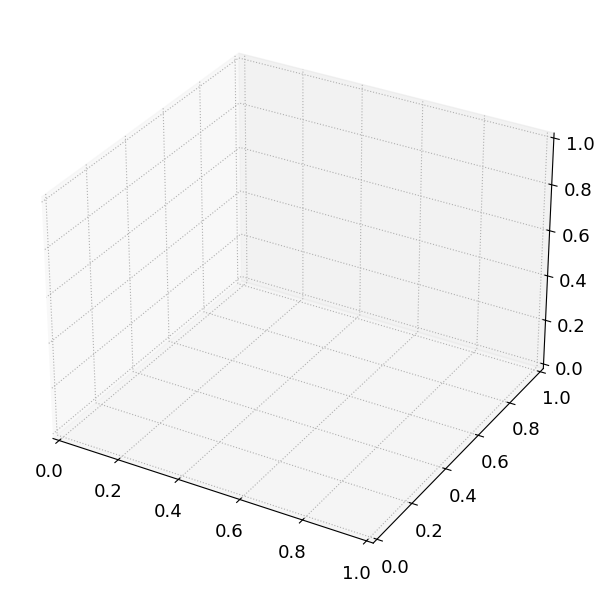

In [46]:
# This code creates a 6×6 inch Matplotlib figure and adds a 3D subplot to it using projection="3d". 
# The variable ax is now a 3D Axes object that can be used to plot data in three dimensions (x, y, z). 
fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection = "3d")
# plt.show() displays the empty 3D plot.
plt.show()

#### 3D subplots with `figure` and `axes` - Explanation

```python
fig = plt.figure(figsize=(6,6))
```

* Creates a **blank figure (canvas)** that is 6 inches wide × 6 inches tall.
* Unlike `plt.subplots()`, this does not yet create any axes (plots).

---

```python
ax = fig.add_subplot(projection="3d")
```

* Adds a subplot (an **Axes**) to the figure.
* The key part is `projection="3d"`.

  * By default, Matplotlib creates **2D axes**.
  * With `projection="3d"`, it creates a **3D Axes object**.
* `ax` is now a **3D plotting area**, where you can call methods like:

  * `ax.plot3D(x, y, z)` → 3D line plot
  * `ax.scatter3D(x, y, z)` → 3D scatter plot
  * `ax.plot_surface(X, Y, Z)` → 3D surface plot

---

```python
plt.show()
```

* Displays the figure.
* Right now it will show an **empty 3D axes box** with x, y, z axes, ready to plot data.

---

#### What’s happening conceptually

* `plt.figure()` = create a canvas.
* `add_subplot(projection="3d")` = add a 3D coordinate system.
* `ax` is your handle for working in 3D.


In [25]:
type(fig)

matplotlib.figure.Figure

In [26]:
type(ax)

mpl_toolkits.mplot3d.axes3d.Axes3D

#### 3D subplot with `subplots`

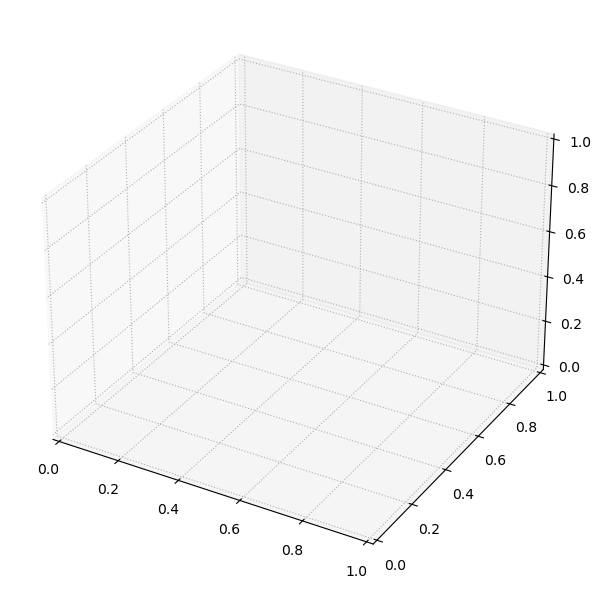

In [27]:
# This code creates a 6×6 inch Matplotlib figure and a single 3D subplot on it using `plt.subplots()`. 
# The `subplot_kw` argument specifies `projection='3d'`, which makes `ax` a 3D Axes object. 
# You can now use `ax` to plot three-dimensional data with methods such as `plot3D`, `scatter3D`, or `plot_surface`. 
fig, ax = plt.subplots(
    subplot_kw=dict(projection='3d'),
    figsize = (6,6))
#`plt.show()` displays the empty 3D axes.
plt.show()

#### 3D subplot with `subplots` - Explanation

```python
fig, ax = plt.subplots(
    subplot_kw=dict(projection='3d'),
    figsize = (6,6))
```

1. **`plt.subplots(...)`**

   * This function creates both a **Figure** (`fig`) and one or more **Axes** (`ax`).
   * A *Figure* is the overall canvas, and an *Axes* is the actual plotting area.

2. **`subplot_kw=dict(projection='3d')`**

   * `subplot_kw` allows you to pass extra options to the subplot being created.
   * Here, `projection='3d'` tells Matplotlib: *“Make this subplot a 3D plotting area instead of the default 2D one.”*
   * That means `ax` becomes a **3D Axes object**, so it knows how to handle 3D methods like `plot3D()`, `scatter3D()`, or `plot_surface()`.

3. **`figsize=(6,6)`**

   * Sets the figure size to 6 inches by 6 inches, giving you a square canvas that looks proportional for a 3D box.

4. **Result of the line**

   * `fig` → the overall figure container (the blank canvas).
   * `ax` → a single **3D subplot** (Axes object) where you can now add 3D data.

---

```python
plt.show()
```

* Displays the figure.
* Since you haven’t plotted any data yet, what you’ll see is just an **empty 3D axes frame** with labeled x, y, and z axes.


#### 3D subplots with `subplots`

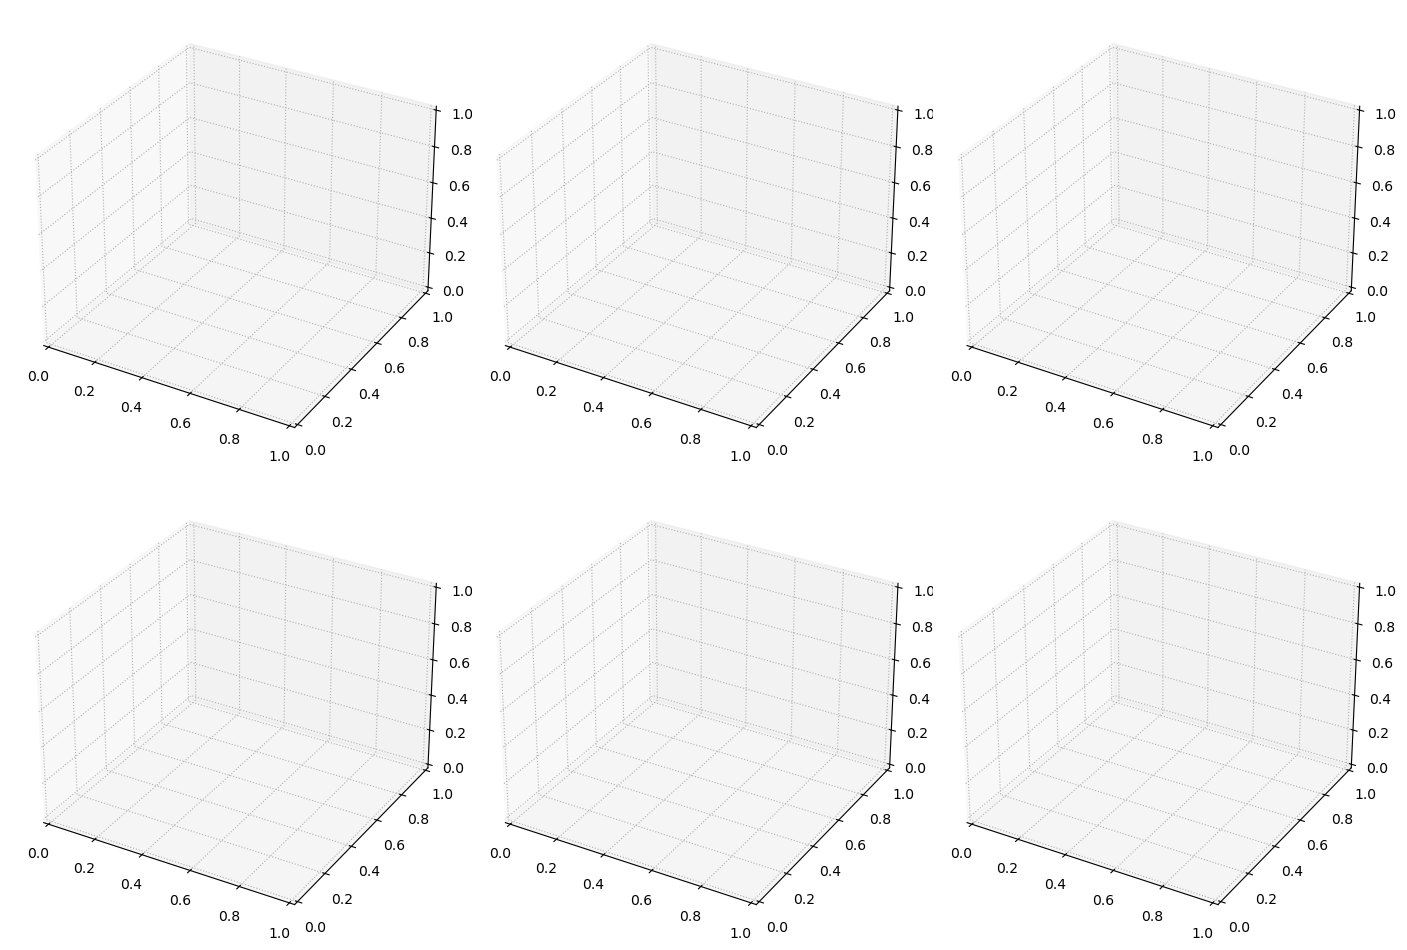

In [28]:
# This code creates a Matplotlib figure (fig) containing a 2×3 grid of subplots (ax), each of which is a 3D Axes object. 
# The subplot_kw=dict(projection='3d') argument ensures that all six subplots are 3D, ready for plotting surfaces, scatterplots, or lines in three dimensions. 
# The variable ax is returned as a 2D NumPy array of shape (2, 3), so each subplot can be accessed by its row and column index (e.g., ax[0,1] for the top-middle 3D plot). 
fig, ax = plt.subplots(
    nrows = 2,
    ncols = 3,
    subplot_kw=dict(projection='3d'))
# plt.show() displays the grid of empty 3D axes.
plt.show()

#### 3D subplots with `subplots` - Explanation

```python
fig, ax = plt.subplots(
    nrows = 2,
    ncols = 3,
    subplot_kw=dict(projection='3d'))
```

1. **`plt.subplots(...)`**

   * Creates a **Figure** (`fig`) and a grid of **Axes** (`ax`).
   * A *Figure* is your entire canvas, and each *Axes* is an individual plotting area.

2. **`nrows=2, ncols=3`**

   * Defines a grid layout: 2 rows × 3 columns = 6 subplots.
   * So instead of one 3D plot, you’ll get six separate 3D axes arranged in a 2×3 grid.

3. **`subplot_kw=dict(projection='3d')`**

   * This passes `projection='3d'` to *every subplot* that’s created in the grid.
   * Normally, subplots are 2D by default, but this turns each one into a **3D Axes object**.
   * That means each element of `ax` can handle 3D plotting commands (`plot3D`, `scatter3D`, `plot_surface`, etc.).

4. **Result of the line**

   * `fig` → one figure object (the whole canvas).
   * `ax` → a **2D NumPy array of shape (2, 3)** containing 6 Axes objects.

     * `ax[0,0]` → top-left 3D subplot
     * `ax[0,2]` → top-right 3D subplot
     * `ax[1,1]` → bottom-middle 3D subplot, etc.

---

```python
plt.show()
```

* Displays the figure.
* Since nothing has been plotted yet, you’ll see a 2×3 grid of empty 3D axes boxes with x, y, and z axes in each.


In [29]:
ax

array([[<Axes3D: >, <Axes3D: >, <Axes3D: >],
       [<Axes3D: >, <Axes3D: >, <Axes3D: >]], dtype=object)

In [30]:
type(ax)

numpy.ndarray

### 5. Plot the points for hours when hourly mean of the temperature is greater than overall mean temperature

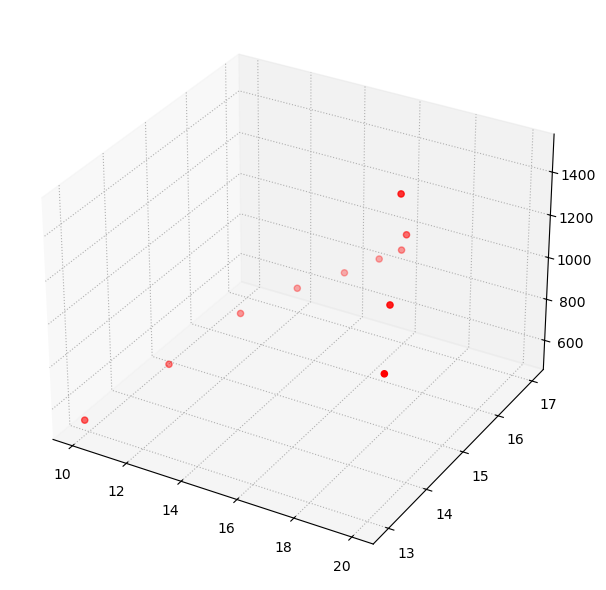

In [31]:
# This code creates a 6×6 inch figure and adds a 3D axes object. 
# It then extracts three columns from the dataset (`Hour`, `Temperature(°C)`, and `Rented Bike Count`) to use as x, y, and z coordinates. 
# Finally, it plots the points as a red 3D scatter plot with circular markers, labeling the group as "Warmer Hours." 
# The result is a visualization that shows how bike rentals (z-axis) vary with both time of day (x-axis) and temperature (y-axis).
fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection = "3d")
Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

plt.show()

### Explanation

```python
Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
```

* Prepares the **x, y, and z coordinates** for the 3D scatter plot:

  * **Xh** → Hour of the day (x-axis).
  * **Yh** → Temperature in °C (y-axis).
  * **Zh** → Number of bikes rented (z-axis).

---

```python
ax.scatter3D(Xh, Yh, Zh, color="red", marker="o", label="Warmer Hours")
```

* Plots the data as a **3D scatter plot**:

  * `Xh, Yh, Zh` are the coordinates.
  * `color="red"` → points are red.
  * `marker="o"` → circular markers.
  * `label="Warmer Hours"` → label for use in a legend (if you add one).

---

```python
plt.show()
```

* Renders the figure.
* You’ll see a **3D scatterplot** where:

  * The x-axis = Hour of the day.
  * The y-axis = Temperature (°C).
  * The z-axis = Number of rented bikes.

In [32]:
%matplotlib inline

### 6. Add the value of temperature as text labels for these points on your plot

In [33]:
for t in zip(Xh, Yh, Zh):
    print(t)

(10, 12.91, 527.82)
(11, 14.31, 600.85)
(12, 15.46, 699.44)
(13, 16.26, 733.25)
(14, 16.82, 758.82)
(15, 17.04, 829.19)
(16, 16.9, 930.62)
(17, 16.25, 1138.51)
(18, 15.3, 1502.93)
(19, 14.28, 1195.15)
(20, 13.39, 1068.96)


#### Explanation

```python
for t in zip(Xh, Yh, Zh):
    print(t)
```

1. **`zip(Xh, Yh, Zh)`**

   * `zip` takes multiple iterables (like lists, arrays, or Pandas Series) and combines them **element by element**.
   * Here it takes `Xh`, `Yh`, and `Zh` (Hour, Temperature, Rented Bikes).
   * On the first loop, it grabs the first element from each → `(Xh[0], Yh[0], Zh[0])`.
   * On the second loop, it grabs the second element from each → `(Xh[1], Yh[1], Zh[1])`.
   * …and so on until the shortest iterable is exhausted.

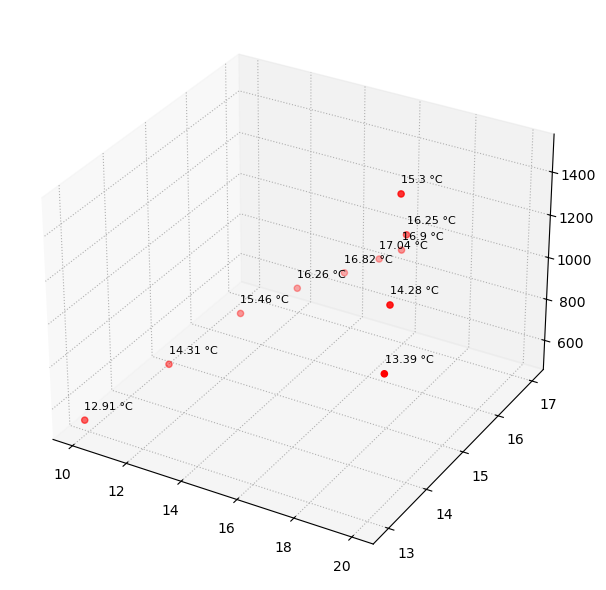

In [34]:
fig = plt.figure(figsize = (6,6))
ax = plt.axes(projection = "3d")

Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh):
     point_label = f"{y} °C"
     ax.text(x, y, z+50, point_label, fontsize = 8)

plt.show()

#### Explanation

```python
for x, y, z in zip(Xh, Yh, Zh):
     point_label = f"{y} °C"
     ax.text(x, y, z+50, point_label, fontsize=8)
```


* **`zip(Xh, Yh, Zh)`**: bundles the three lists/series so one can iterate through corresponding values (hour, temperature, rentals).
* Inside the loop, for each point:

  * `point_label = f"{y} °C"` creates a string label showing the temperature.
  * `ax.text(x, y, z+50, point_label, fontsize=8)` places that label as 3D text slightly above the point (`z+50` makes it “float” above the dot instead of overlapping it).
* So each red dot gets a little annotation showing its temperature.


### 7. Plot the points for hours when hourly mean of the temperature is less than or equal to the overall mean temperature

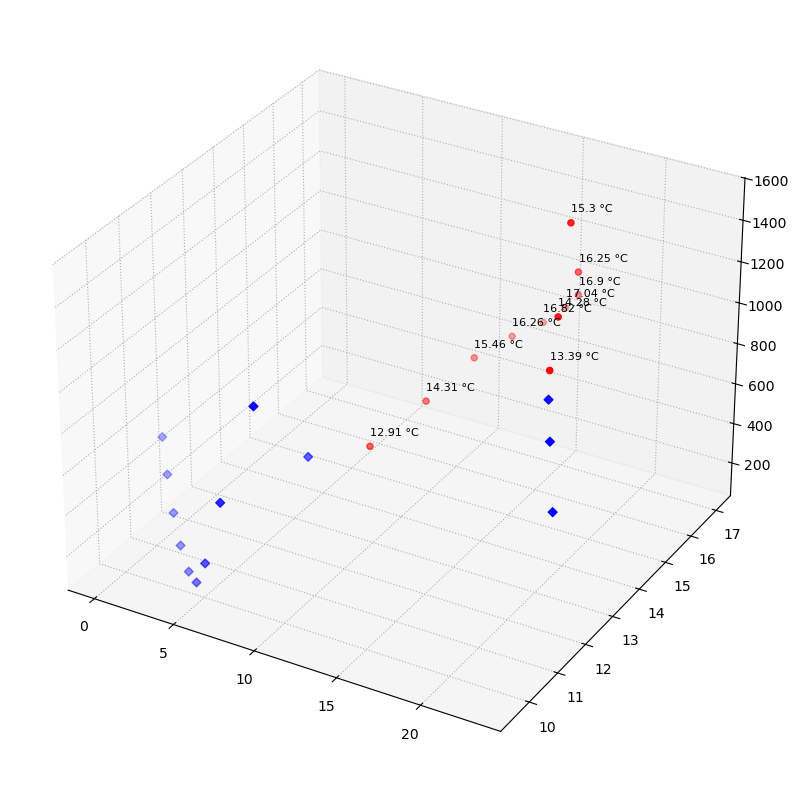

In [35]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = "3d")

Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh):
     point_label = f"{y} °C"
     ax.text(x, y, z+50, point_label, fontsize = 8)

Xl = data_lower["Hour"]
Yl = data_lower["Temperature(°C)"]
Zl = data_lower["Rented Bike Count"]
ax.scatter3D(Xl, Yl, Zl, color = "blue", marker = "D", label = "Cooler Hours")

plt.show()

### 8. Add the value of temperature text labels for these points to your plot

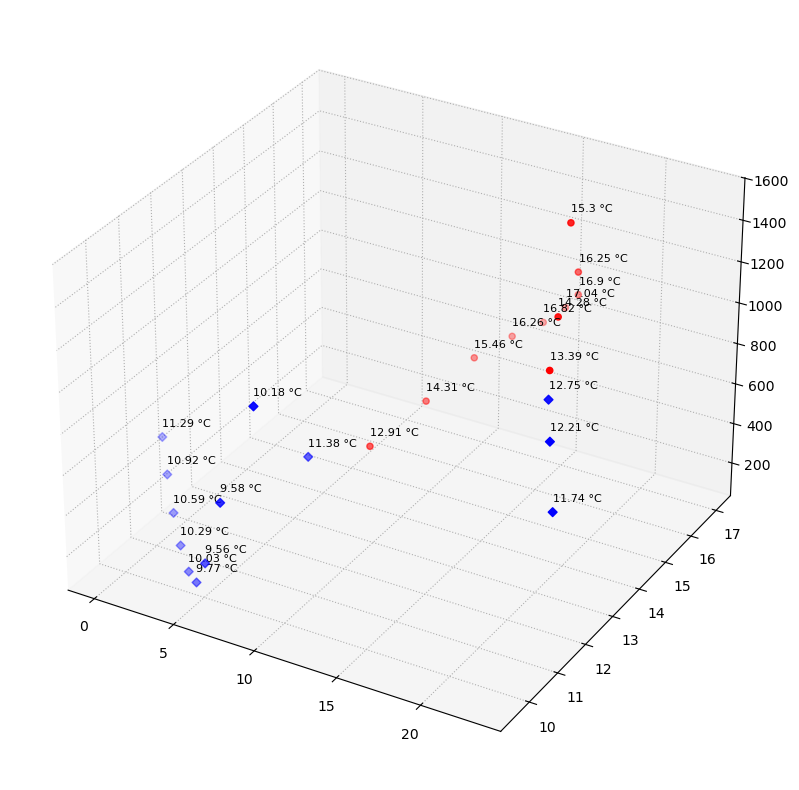

In [36]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = "3d")

Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh):
     point_label = f"{y} °C"
     ax.text(x, y, z+50, point_label, fontsize = 8)

Xl = data_lower["Hour"]
Yl = data_lower["Temperature(°C)"]
Zl = data_lower["Rented Bike Count"]
ax.scatter3D(Xl, Yl, Zl, color = "blue", marker = "D", label = "Cooler Hours")

for x, y, z in zip(Xl, Yl, Zl):
     point_label = f"{y} °C"
     ax.text(x, y, z+50, point_label, fontsize = 8)

plt.show()

### 9. Set the ticks for the plot axis

Temperature range: Min: 9 - Max: 17


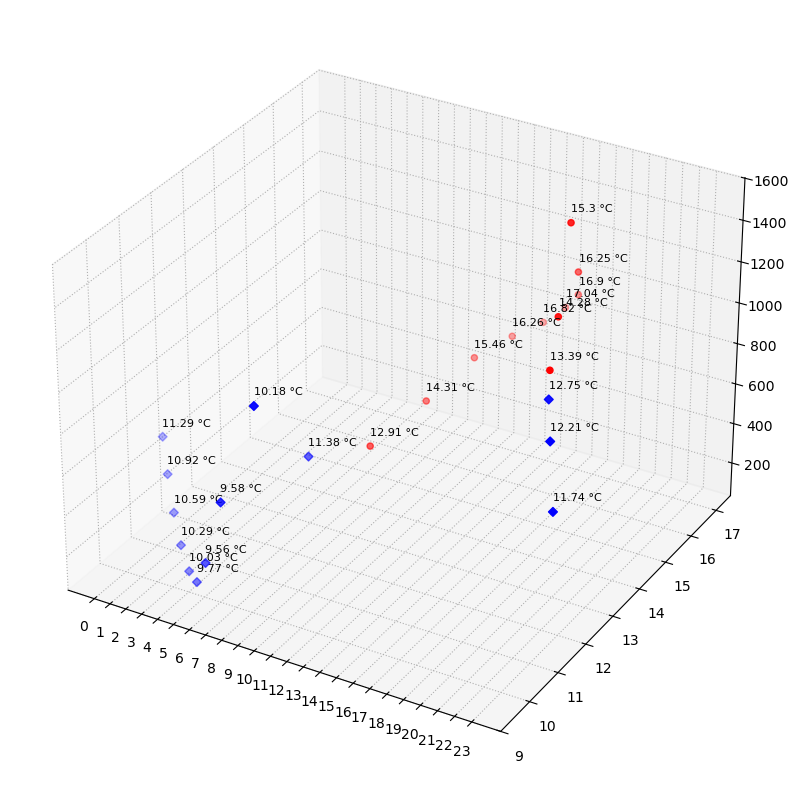

In [37]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = "3d")

Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh):
     label = f"{y} °C"
     ax.text(x, y, z+50, label, fontsize = 8)

Xl = data_lower["Hour"]
Yl = data_lower["Temperature(°C)"]
Zl = data_lower["Rented Bike Count"]
ax.scatter3D(Xl, Yl, Zl, color = "blue", marker = "D", label = "Cooler Hours")

for x, y, z in zip(Xl, Yl, Zl):
     point_label = f"{y} °C"
     ax.text(x, y, z+50, point_label, fontsize = 8)

xticks = range(24)
ax.set_xticks(xticks)

min_temp = int(min(data_lower["Temperature(°C)"]))
max_temp = int(max(data_higher["Temperature(°C)"])) + 1
print(f"Temperature range: Min: {min_temp} - Max: {max_temp-1}")
yticks = range(min_temp, max_temp)
ax.set_yticks(yticks)

plt.show()

### 10. Set the labels for plot axis and plot title

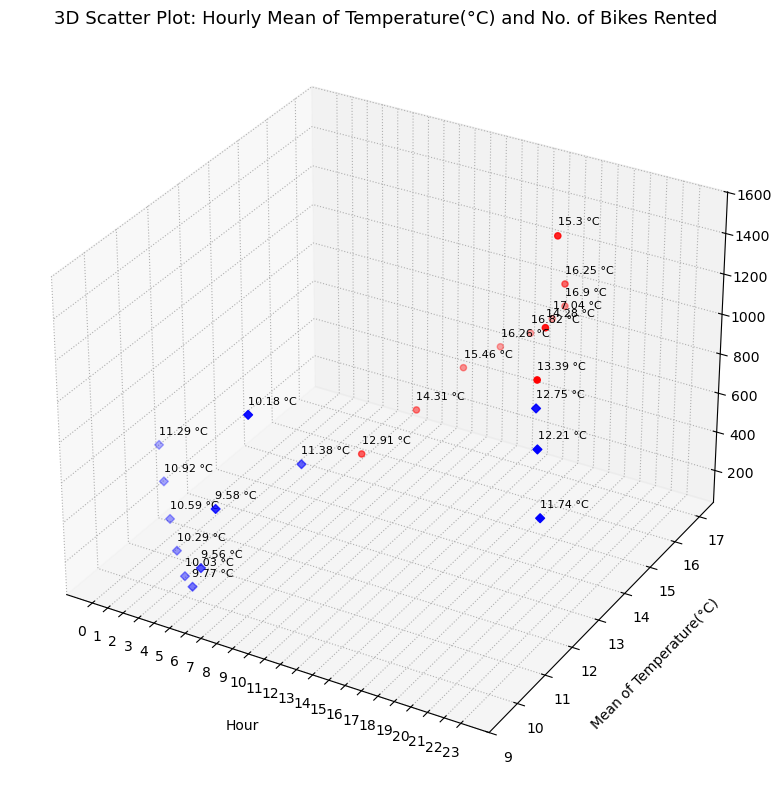

In [38]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = "3d")

Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh):
     label = f"{y} °C"
     ax.text(x, y, z+50, label, fontsize = 8)

Xl = data_lower["Hour"]
Yl = data_lower["Temperature(°C)"]
Zl = data_lower["Rented Bike Count"]
ax.scatter3D(Xl, Yl, Zl, color = "blue", marker = "D", label = "Cooler Hours")

for x, y, z in zip(Xl, Yl, Zl):
     label = f"{y} °C"
     ax.text(x, y, z+50, label, fontsize = 8)

xticks = range(24)
ax.set_xticks(xticks)

min_temp = int(min(data_lower["Temperature(°C)"]))
max_temp = int(max(data_higher["Temperature(°C)"])) + 1
yticks = range(min_temp, max_temp)
ax.set_yticks(yticks)

ax.set_title("3D Scatter Plot: Hourly Mean of Temperature(°C) and No. of Bikes Rented", fontsize = 13)

ax.set_xlabel("Hour", fontsize = 10, labelpad=12)
ax.set_ylabel("Mean of Temperature(°C)", fontsize = 10, labelpad=12)
ax.set_zlabel("Mean of Rented Bike Count", fontsize = 10, labelpad=12)

plt.show()

### 11. Add a legend to the plot

### Hourly Mean Temperature - 3D Scatterplot

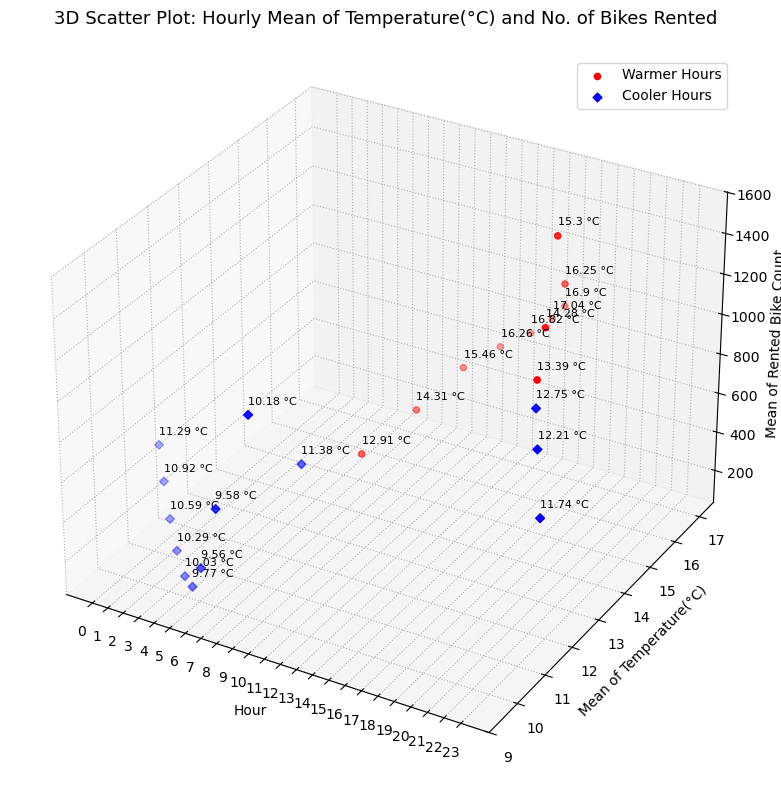

In [39]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = "3d")

Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh):
     label = f"{y} °C"
     ax.text(x, y, z+50, label, fontsize = 8)

Xl = data_lower["Hour"]
Yl = data_lower["Temperature(°C)"]
Zl = data_lower["Rented Bike Count"]
ax.scatter3D(Xl, Yl, Zl, color = "blue", marker = "D", label = "Cooler Hours")

for x, y, z in zip(Xl, Yl, Zl):
     label = f"{y} °C"
     ax.text(x, y, z+50, label, fontsize = 8)

xticks = range(24)
ax.set_xticks(xticks)

min_temp = int(min(data_lower["Temperature(°C)"]))
max_temp = int(max(data_higher["Temperature(°C)"])) + 1
yticks = range(min_temp, max_temp)
ax.set_yticks(yticks)

ax.set_title("3D Scatter Plot: Hourly Mean of Temperature(°C) and No. of Bikes Rented")

ax.set_xlabel("Hour", fontsize = 10)
ax.set_ylabel("Mean of Temperature(°C)", fontsize = 10) 
ax.set_zlabel("Mean of Rented Bike Count", fontsize = 10)

plt.legend(borderaxespad = 2.5)
fig.savefig(img_loc+"3D_Hourly_Mean_Temperature_Scatter_Plot.png" , dpi = 400)
plt.show()


###  Hourly Mean Temperature - 3D Scatterplot

#### **1. Plot Overview**

* This is a **3D scatter plot**. Each point shows the relationship between **hour of the day (x-axis)**, **mean temperature (y-axis)**, and **mean number of bikes rented (z-axis)**.
* The plot uses two groups of points:

  * **Red circles** for warmer hours.
  * **Blue diamonds** for cooler hours.
* Labels above each point show the exact temperature values.
* This plot helps answer questions like:

  * *How does bike rental volume change across hours of the day?*
  * *What role does temperature play in rental behavior?*
  * *Do warmer hours consistently show higher rentals than cooler ones?*

---

#### **2. Code Breakdown**

```python
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")
```

* Creates a square 8×8 inch figure and adds a **3D axes** so one can plot x, y, z data.

```python
Xh = data_higher["Hour"]; Yh = data_higher["Temperature(°C)"]; Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color="red", marker="o", label="Warmer Hours")
```

* Extracts the warmer-hours data.
* Plots it as red circles (`marker="o"`) in 3D space.

```python
for x, y, z in zip(Xh, Yh, Zh):
    label = f"{y} °C"
    ax.text(x, y, z+50, label, fontsize=8)
```

* Loops through the warmer points and adds a temperature label slightly above each point (`z+50` prevents overlap).

```python
Xl = data_lower["Hour"]; Yl = data_lower["Temperature(°C)"]; Zl = data_lower["Rented Bike Count"]
ax.scatter3D(Xl, Yl, Zl, color="blue", marker="D", label="Cooler Hours")
```

* Extracts the cooler-hours data.
* Plots it as blue diamonds (`marker="D"`).

```python
for x, y, z in zip(Xl, Yl, Zl):
    label = f"{y} °C"
    ax.text(x, y, z+50, label, fontsize=8)
```

* Adds temperature labels above the cooler-hour points.

```python
xticks = range(24); ax.set_xticks(xticks)
min_temp = int(min(data_lower["Temperature(°C)"])); max_temp = int(max(data_higher["Temperature(°C)"]))+1
yticks = range(min_temp, max_temp); ax.set_yticks(yticks)
```

* Sets ticks for hours (0–23) and for temperatures, ensuring clean and interpretable axes.

```python
ax.set_title("3D Scatter Plot: Hourly Mean of Temperature(°C) and No. of Bikes Rented")
ax.set_xlabel("Hour"); ax.set_ylabel("Mean of Temperature(°C)"); ax.set_zlabel("Mean of Rented Bike Count")
```

* Adds a descriptive title and axis labels.

```python
plt.legend(borderaxespad=2.5)
```

* Adds a legend with padding so it doesn’t overlap the 3D plot.

```python
fig.savefig(..., dpi=400)
plt.show()
```

* Saves a high-resolution image and displays it.

---

#### **3. Visual Elements Analysis: Answer the following questions**

* What do you notice about the two colors of markers — does this make it easier to compare cooler and warmer hours?
* How would you describe the point labels — do they help you interpret the exact temperature, or do they feel a bit crowded?
* What do you notice about the axes labels and ticks — are the scales clear and easy to follow?
* How does the legend placement improve readability?

---

#### **4. Data Interpretation: Answer the following questions**

* Do warmer hours (red points) generally correspond to higher bike rentals compared to cooler hours (blue points)?
* Around what temperature range do rentals seem to peak?
* Are there any outliers — hours where rentals are surprisingly high or low given the temperature?
* Does the relationship between temperature and rentals look linear, or does it plateau at a certain point?

---

#### **5. Learning Points**

* **Key Matplotlib concepts demonstrated:**

  * Creating 3D scatter plots with `ax.scatter3D`.
  * Adding annotations to 3D data points with `ax.text`.
  * Using color and marker shape to distinguish groups.
  * Customizing ticks and labels for clarity.
* **When to use this plot type:**

  * When you want to explore how **three variables interact**.
  * Particularly useful in time/weather/sales-type data.
* **Common student mistakes I’ve seen:**

  * Forgetting to offset labels (`z+50`), which causes overlap with markers.
  * Not setting axis ticks, leaving default scales that don’t match the data range.
  * Using too many annotation labels, which can clutter the figure.
* **One suggestion for improvement:**

  * Instead of labeling **every point**, you could label only key hours (like peak or lowest rentals) to reduce clutter and make insights pop.



In [40]:
plt.rcParams["legend.fontsize"]

10.0

### 12. Save your plot as a png file with a resolution of 300dpi

In [41]:
fig.savefig("P2_M2.png", dpi = 300)

### Change of Point of View

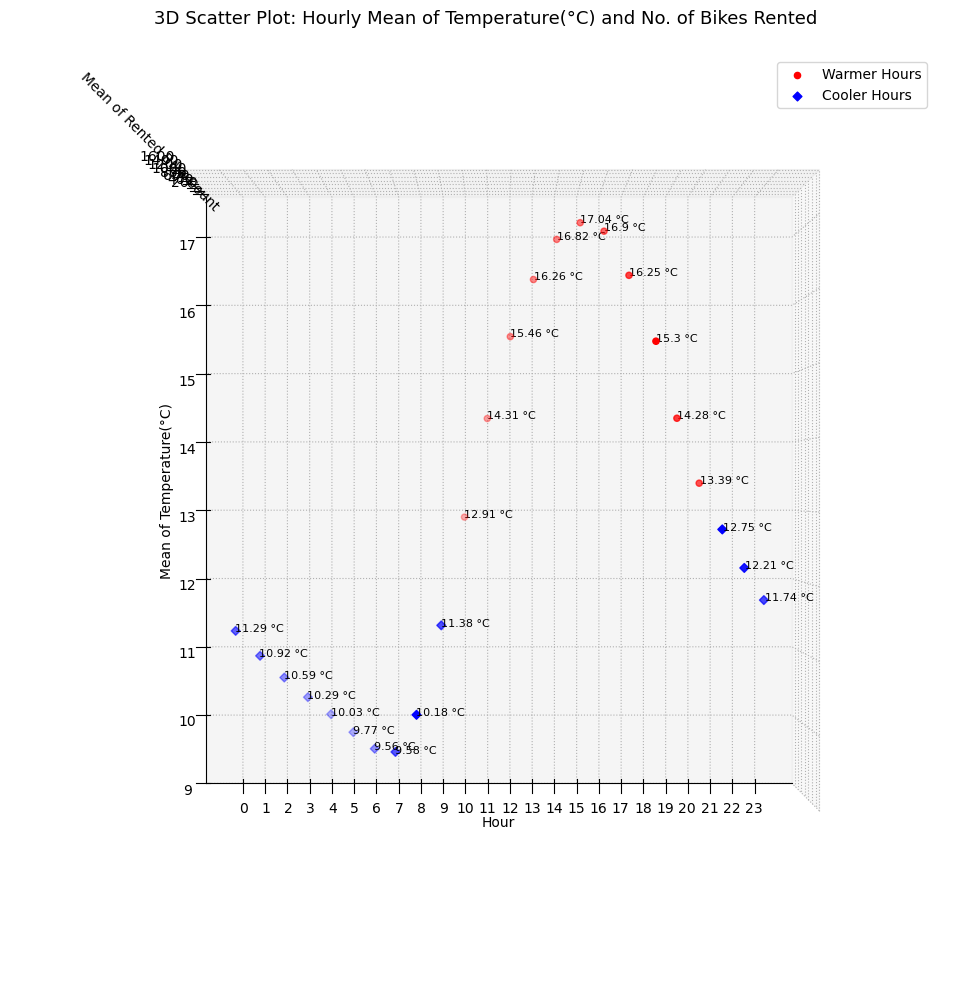

In [42]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.view_init(90, -90)

Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
ax.scatter3D(Xh, Yh, Zh, color = "red", marker = "o", label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh):
     label = f"{y} °C"
     ax.text(x, y, z+50, label, fontsize = 8)

Xl = data_lower["Hour"]
Yl = data_lower["Temperature(°C)"]
Zl = data_lower["Rented Bike Count"]
ax.scatter3D(Xl, Yl, Zl, color = "blue", marker = "D", label = "Cooler Hours")

for x, y, z in zip(Xl, Yl, Zl):
     label = f"{y} °C"
     ax.text(x, y, z+50, label, fontsize = 8)

xticks = range(24)
ax.set_xticks(xticks)

min_temp = int(min(data_lower["Temperature(°C)"]))
max_temp = int(max(data_higher["Temperature(°C)"])) + 1
yticks = range(min_temp, max_temp)
ax.set_yticks(yticks)

ax.set_title("3D Scatter Plot: Hourly Mean of Temperature(°C) and No. of Bikes Rented")

ax.set_xlabel("Hour", fontsize = 10)
ax.set_ylabel("Mean of Temperature(°C)", fontsize = 10) 
ax.set_zlabel("Mean of Rented Bike Count", fontsize = 10)

plt.legend(borderaxespad = 2.5)
plt.show()

In [43]:
plt.rcParams['ytick.labelsize'] = 14

In [44]:
plt.rcParams['xtick.labelsize'] = 13

### Visualizing 3 variables in 2D

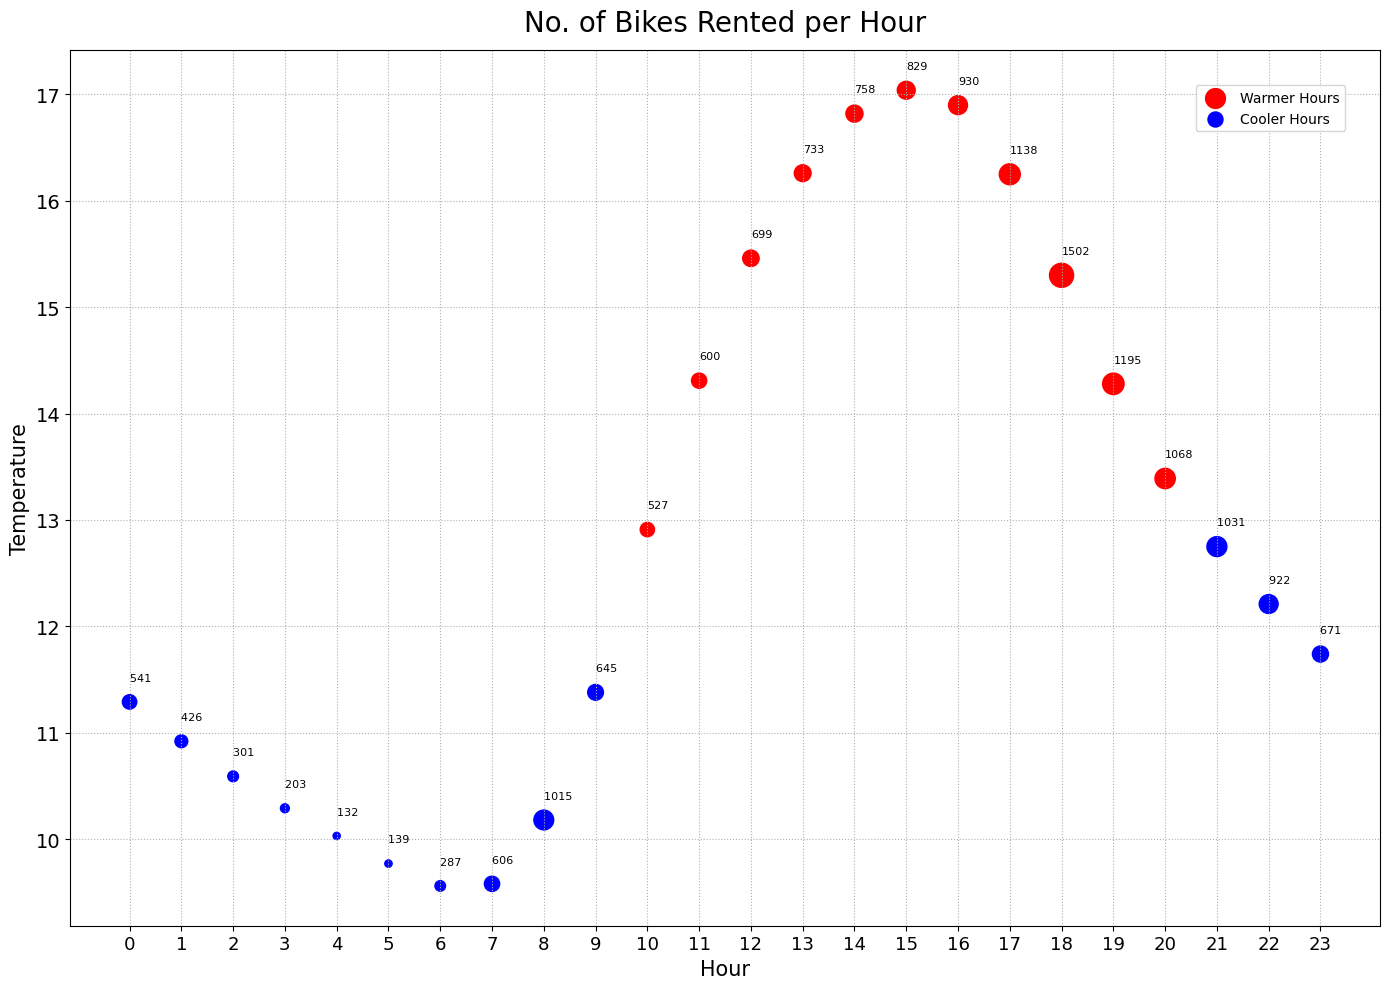

In [45]:
fig = plt.figure()
ax = plt.axes()
Xh = data_higher["Hour"]
Yh = data_higher["Temperature(°C)"]
Zh = data_higher["Rented Bike Count"]
sizeh = (Zh/5).round(0)
ax.scatter(Xh,  Yh, color = "red", marker = "o", s = sizeh, label = "Warmer Hours")

for x, y, z in zip(Xh, Yh, Zh.astype(int)):
     bikes_label = f"{z}"
     ax.text(x, y+0.2, bikes_label, fontsize = 8)

Xl = data_lower["Hour"]
Yl = data_lower["Temperature(°C)"]
Zl = data_lower["Rented Bike Count"]
sizel = (Zl/5).round(0)
ax.scatter(Xl, Yl, color = "blue", marker = "o", s= sizel, label = "Cooler Hours")

for x, y, z in zip(Xl, Yl, Zl.astype(int)):
     bikes_label = f"{z} "
     ax.text(x, y+0.2, bikes_label, fontsize = 8)

xticks = range(24)
ax.set_xticks(xticks)


ax.set_title("No. of Bikes Rented per Hour", pad = 14, fontsize = 20)

ax.set_xlabel("Hour", fontsize = 15)
ax.set_ylabel("Temperature", fontsize = 15)

ax.grid(linestyle = ":")
plt.legend(borderaxespad = 2.5)
fig.savefig(img_loc+"2D_Scatter_Plot_with_3_variables.png" , dpi = 400)
plt.show()

### Visualizing 3 variables in 2D

#### **1. Plot Overview**

* This is a **bubble scatter plot** — a type of scatter plot where the **x-axis = Hour**, the **y-axis = Temperature (°C)**, and the **size of each bubble = number of bikes rented**.
* The color (red for warmer hours, blue for cooler hours) separates the data into two groups.
* Labels above each bubble show the actual rental counts.
* This visualization helps answer:

  * *At which hours are more bikes rented?*
  * *How do rentals vary with temperature throughout the day?*
  * *Do warmer hours generally correspond to higher rentals compared to cooler hours?*

---

#### **2. Code Breakdown**

```python
fig = plt.figure()
ax = plt.axes()
```

* Creates a blank figure and adds standard 2D axes.

```python
Xh = data_higher["Hour"]; Yh = data_higher["Temperature(°C)"]; Zh = data_higher["Rented Bike Count"]
sizeh = (Zh/5).round(0)
ax.scatter(Xh, Yh, color="red", marker="o", s=sizeh, label="Warmer Hours")
```

* Extracts the warmer-hours data.
* `s=sizeh` scales bubble sizes to reflect rental counts. Dividing by 5 prevents them from being too large.
* Plots these as red circles.

```python
for x, y, z in zip(Xh, Yh, Zh.astype(int)):
    bikes_label = f"{z}"
    ax.text(x, y+0.2, bikes_label, fontsize=8)
```

* Loops through each warmer-hour point and places a text label slightly above it (`y+0.2`).
* Shows the exact rental number above each bubble.

```python
Xl = data_lower["Hour"]; Yl = data_lower["Temperature(°C)"]; Zl = data_lower["Rented Bike Count"]
sizel = (Zl/5).round(0)
ax.scatter(Xl, Yl, color="blue", marker="o", s=sizel, label="Cooler Hours")
```

* Extracts cooler-hours data.
* Plots these as blue circles with bubble sizes scaled by rentals.

```python
for x, y, z in zip(Xl, Yl, Zl.astype(int)):
    bikes_label = f"{z} "
    ax.text(x, y+0.2, bikes_label, fontsize=8)
```

* Adds labels for cooler-hour points.

```python
xticks = range(24)
ax.set_xticks(xticks)
```

* Ensures the x-axis shows all 24 hours.

```python
ax.set_title("No. of Bikes Rented per Hour", pad=14, fontsize=20)
ax.set_xlabel("Hour", fontsize=15); ax.set_ylabel("Temperature", fontsize=15)
ax.grid(linestyle=":")
plt.legend(borderaxespad=2.5)
```

* Adds a clear title, axis labels, and dotted gridlines.
* Places the legend with padding so it doesn’t overlap.

```python
fig.savefig(..., dpi=400)
plt.show()
```

* Saves the plot in high resolution and displays it.

---

#### **3. Visual Elements Analysis: Answer the following questions**

* What do you notice about the bubble sizes — how does this help you see which hours had more rentals?
* How would you describe the color coding — does it make the comparison between warmer and cooler hours clearer?
* What do you notice about the text labels above the bubbles — do they add clarity or make the chart feel busy?
* How does the grid style (dotted lines) help guide your eye?

---

#### **4. Data Interpretation: Answer the following questions)**

* During which hours do the largest bubbles appear, and what does that tell us about peak rental demand?
* Do warmer hours (red points) consistently show higher rental counts than cooler hours (blue points)?
* Are there any surprises — cooler hours with unexpectedly high rentals, or warmer hours with lower ones?

---

#### **5. Learning Points**

* **Key Matplotlib concepts:**

  * Using bubble size (`s=`) to encode a third variable.
  * Customizing scatter plot colors to distinguish groups.
  * Annotating points with `ax.text()` for clarity.
  * Adjusting axis ticks to match time data.
* **When to use this plot:**

  * When you want to show **three variables at once** in 2D.
  * Great for time series data with an extra dimension (like rentals, sales, or counts).
* **Common mistakes students make:**

  * Forgetting to rescale bubble sizes → bubbles can overwhelm the plot.
  * Adding too many labels → the chart becomes cluttered.
  * Not distinguishing groups with clear colors.

